In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn.linear_model 
import sklearn.metrics 
import sklearn.preprocessing

In [2]:
sales = pd.read_csv('Advertising.csv', index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression(fit_intercept=True)      # default already; fit_intercept = True 

TV slope    :  0.047536640433019764
TV intercept:  7.032593549127693


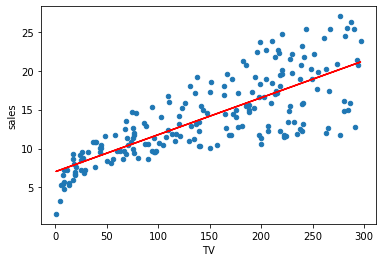

In [4]:
X = sales[['TV']]     # need in 2-D
y = sales['sales']
model.fit(X, y)

print("TV slope    : ", model.coef_[0])
print("TV intercept: ", model.intercept_)

sales.plot.scatter(x='TV', y='sales')
plt.plot(sales['TV'], model.predict(sales[['TV']]), c='red')
plt.show();

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(sales['sales'], model.predict(sales[['TV']]))  )
print(r2_score(sales['sales'], model.predict(sales[['TV']]))  )

10.512652915656757
0.611875050850071


TV slope    :  0.20249578339243968
TV intercept:  9.311638095158283


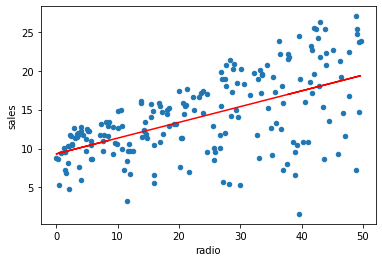

In [6]:
X = sales[['radio']]     # need in 2-D
y = sales['sales']
model.fit(X, y)

print("TV slope    : ", model.coef_[0])
print("TV intercept: ", model.intercept_)

sales.plot.scatter(x='radio', y='sales')
plt.plot(sales['radio'], model.predict(sales[['radio']]), c='red')
plt.show();

In [7]:
print(mean_squared_error(sales['sales'], model.predict(sales[['radio']]))  )
print(r2_score(sales['sales'], model.predict(sales[['radio']]))  )

18.09239774512544
0.33203245544529525


TV slope    :  0.05469309847227336
TV intercept:  12.35140706927816


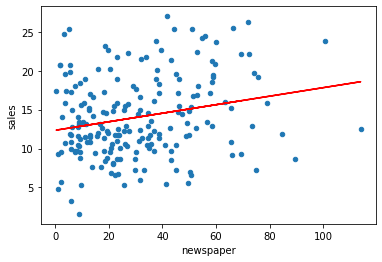

In [8]:
X = sales[['newspaper']]     # need in 2-D
y = sales['sales']
model.fit(X, y)

print("TV slope    : ", model.coef_[0])
print("TV intercept: ", model.intercept_)

sales.plot.scatter(x='newspaper', y='sales')
plt.plot(sales['newspaper'], model.predict(sales[['newspaper']]), c='red')
plt.show();

In [9]:
print(mean_squared_error(sales['sales'], model.predict(sales[['newspaper']]))  )
print(r2_score(sales['sales'], model.predict(sales[['newspaper']]))  )

25.674022720559698
0.05212044544430516


Multilinear Regression : 

In [10]:
X = sales[['TV', 'radio', 'newspaper']]
y = sales['sales']

model.fit(X, y)

print("MLR slope    : ", model.coef_[:3])
print("MLR intercept: ", model.intercept_)

MLR slope    :  [ 0.04576465  0.18853002 -0.00103749]
MLR intercept:  2.9388893694594085


In [11]:
features = ['TV', 'radio', 'newspaper']

result = zip(features, model.coef_)
resultSet = set(result)

print(resultSet)   # sort by alphabet orders

{('newspaper', -0.0010374930424763272), ('radio', 0.18853001691820456), ('TV', 0.045764645455397615)}


In [12]:
print("MSE      :", mean_squared_error(sales['sales'], model.predict(sales[features]))  )
print("R-square :", r2_score(sales['sales'], model.predict(sales[features]))            )

MSE      : 2.7841263145109365
R-square : 0.8972106381789521


#### TV:
MSE      : 10.512652915656757\
R-square : 0.611875050850071

#### radio:
MSE      : 18.09239774512544\
R-square : 0.33203245544529525

#### newspaper:
MSE      : 25.674022720559698\
R-square : 0.05212044544430516

#### MLR:
MSE      : 2.7841263145109365\
R-square : 0.8972106381789521

Introduce Features Scaling: 

In [13]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer().fit(X)
X_scaled = scaler.transform(X)
X_scaled[:4,:]


array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643]])

In [15]:
model.fit(X_scaled, sales['sales'])

print("MLR slope    : ", model.coef_[:3])
print("MLR intercept: ", model.intercept_)

print("MSE      : ", mean_squared_error(sales['sales'], model.predict(X_scaled)))
print("R-square : ", r2_score(sales['sales'], model.predict(X_scaled)))

MLR slope    :  [3.97075539 2.76424808 0.0643293 ]
MLR intercept:  14.0225
MSE      :  2.5064067571002666
R-square :  0.9074639862122942


In [16]:
features

['TV', 'radio', 'newspaper']

In [17]:
result = zip(features, model.coef_)
resultSet = set(result)

print(resultSet)

{('newspaper', 0.06432930163320759), ('TV', 3.9707553863143183), ('radio', 2.7642480807222145)}


Done!\
using the scaling give the better estimation to our model!